Daftar isi :<br>
<a href="#kelamin">1. Jenis kelamin</a><br>
<a href="#umur">2. Umur</a><br>
<a href="#selamat">3. Selamat ato engga</a><br>
<a href="#intubasi">4. Diintubasi ato engga</a><br>
<a href="#icu">5. Masuk ICU ato engga</a><br>
<a href="#suhu">6. Suhu tubuh</a><br>
<a href="#jumlah">7. Jumlah leukosit, neutrofil, dan limfosit</a><br>
<a href="#lokasi">8. Lokasi</a><br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("metadata.csv")
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [4]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date',
       'location', 'folder', 'filename', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 28'],
      dtype='object')

In [5]:
df['patientid'].value_counts()

19     8
205    7
13     7
17     5
117    5
      ..
118    1
195    1
111    1
110    1
103    1
Name: patientid, Length: 204, dtype: int64

In [6]:
df['finding'].value_counts()

COVID-19          296
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
E.Coli              4
ARDS                4
No Finding          3
Chlamydophila       2
Legionella          2
Klebsiella          1
Name: finding, dtype: int64

In [7]:
df['license'].value_counts()

CC BY-NC-SA                          149
CC BY-NC-SA 4.0                       23
CC BY-NC-ND                           14
Apache 2.0                            10
listed as authorized for everyone      7
CC BY                                  2
CC BY-SA                               1
Name: license, dtype: int64

In [8]:
df['went_icu'].value_counts()

Y    32
N     3
Name: went_icu, dtype: int64

# Jenis kelamin
<a id="kelamin"/>

In [9]:
df_covid = df.loc[df['finding'] == "COVID-19"]

In [10]:
#pasien yang sama bisa ditulis beberapa kali, jadi di groupby trus dipilih baris pertama dulu
sex = df_covid.groupby('patientid')['sex'].first()
sex.value_counts()

M    91
F    52
Name: sex, dtype: int64

Text(0.5, 1.0, 'Perbandingan Jumlah Pria (M) dan Wanita (F) Pasien COVID-19')

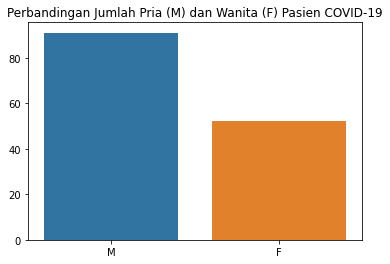

In [11]:
x = sex.value_counts().index
y = sex.value_counts().values
sns.barplot(x=x, y=y)
plt.title("Perbandingan Jumlah Pria (M) dan Wanita (F) Pasien COVID-19")

# Umur
<a id="umur"/>

In [12]:
age = df_covid.groupby('patientid')['age'].mean().dropna()
age

patientid
2      65.0
4      52.0
11     56.0
12     42.0
13     35.0
       ... 
201    77.0
202    83.0
203    45.0
204    45.0
205    55.0
Name: age, Length: 137, dtype: float64

Text(0.5, 0, 'Umur')

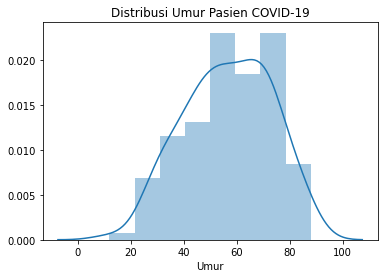

In [13]:
sns.distplot(age)
plt.title("Distribusi Umur Pasien COVID-19")
plt.xlabel("Umur")

In [14]:
sex_and_age = df_covid.groupby('patientid')['sex', 'age'].first().dropna()
sex_and_age

,sex,age
patientid,,
2,M,65.0
4,F,52.0
11,M,56.0
12,M,42.0
13,M,35.0
...,...,...
201,M,77.0
202,M,83.0
203,F,45.0


Text(0.5, 0, 'Umur')

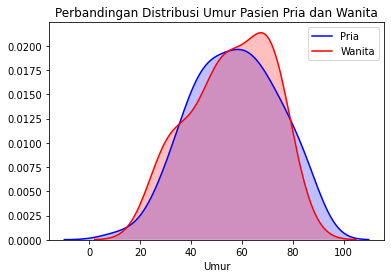

In [15]:
sns.kdeplot(sex_and_age[sex_and_age["sex"]=="M"]["age"], shade=True, color="b", label="Pria")
sns.kdeplot(sex_and_age[sex_and_age["sex"]=="F"]["age"], shade=True, color="r", label="Wanita")
plt.title("Perbandingan Distribusi Umur Pasien Pria dan Wanita")
plt.xlabel("Umur")

# Selamat ato engga
<a id="selamat"/>

In [16]:
survival = df_covid.groupby('patientid')['survival'].first().fillna("Unknown").value_counts()
survival

Unknown    135
Y           25
N            6
Name: survival, dtype: int64

Text(0.5, 1.0, 'Status Keselamatan Pasien (Selamat atau Meninggal)')

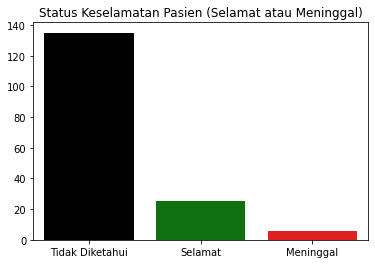

In [17]:
x = ["Tidak Diketahui", "Selamat", "Meninggal"]
y = survival.values
sns.barplot(x, y, palette=["black", "green", "red"])
plt.title("Status Keselamatan Pasien (Selamat atau Meninggal)")

# Diintubasi ato engga
<a id="intubasi"/>

In [18]:
intubated = df_covid.groupby('patientid')['intubated'].first().fillna("Unknown").value_counts()
intubated

Unknown    139
Y           21
N            6
Name: intubated, dtype: int64

Text(0.5, 1.0, 'Apakah Pasien Diintubasi?')

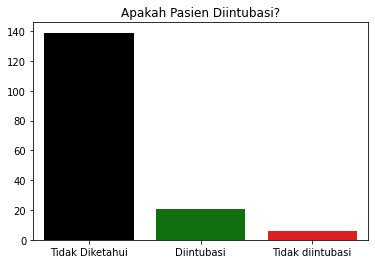

In [19]:
x = ["Tidak Diketahui", "Diintubasi", "Tidak diintubasi"]
y = intubated.values
sns.barplot(x, y, palette=["black", "green", "red"])
plt.title("Apakah Pasien Diintubasi?")

# Masuk ICU ato engga
<a id="icu"/>

In [20]:
icu = df_covid.groupby('patientid')['went_icu'].first().fillna("Unknown").value_counts()
icu

Unknown    157
Y            8
N            1
Name: went_icu, dtype: int64

Text(0.5, 1.0, 'Apakah Pasien Masuk ICU?')

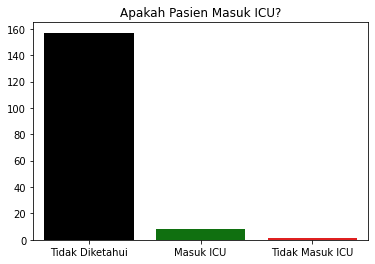

In [21]:
x = ["Tidak Diketahui", "Masuk ICU", "Tidak Masuk ICU"]
y = icu.values
sns.barplot(x, y, palette=["black", "green", "red"])
plt.title("Apakah Pasien Masuk ICU?")

# Suhu tubuh
<a id="suhu"/>

In [22]:
temp = df_covid.groupby('patientid')['survival','temperature'].first().fillna({'survival':'Unknown'}).dropna()
temp

,survival,temperature
patientid,,
11,Y,38.6
12,Y,39.6
13,Y,37.2
19,Y,36.4
37,Unknown,37.5
39,Unknown,38.0
41,Unknown,37.8
42,Unknown,36.5
51,Y,39.0


Text(0.5, 1.0, 'Distribusi Suhu Tubuh Pasien')

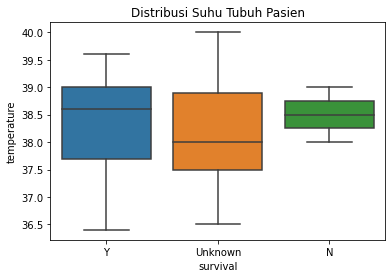

In [23]:
#hapus outlier (suhu tubuh 90 derajat gamasuk akal)
temp = temp[temp["temperature"]<50]
sns.boxplot(data=temp, x="survival", y="temperature")
plt.title("Distribusi Suhu Tubuh Pasien")

# Jumlah leukosit, neutrofil, dan limfosit
<a id="jumlah"/>

In [24]:
df_covid[['pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count']]

,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
367,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN
370,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Distribusi Saturasi pO2')

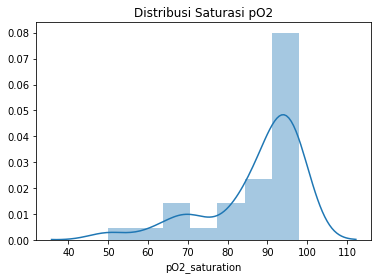

In [25]:
po2 = df_covid.groupby('patientid')["pO2_saturation"].first().dropna()
sns.distplot(po2)
plt.title("Distribusi Saturasi pO2")

Text(0.5, 1.0, 'Distribusi Jumlah Leukosit')

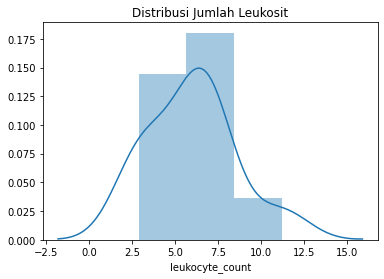

In [26]:
leukosit = df_covid.groupby('patientid')["leukocyte_count"].first().dropna()
sns.distplot(leukosit)
plt.title("Distribusi Jumlah Leukosit")

Text(0.5, 1.0, 'Distribusi Jumlah Neutrofil')

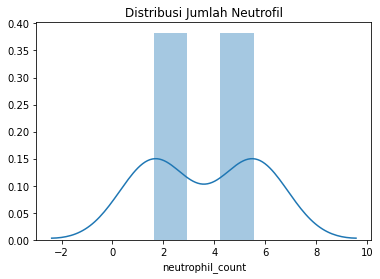

In [27]:
neutrofil = df_covid.groupby('patientid')["neutrophil_count"].first().dropna()
sns.distplot(neutrofil, bins=3)
plt.title("Distribusi Jumlah Neutrofil")

Text(0.5, 1.0, 'Distribusi Jumlah Limfosit')

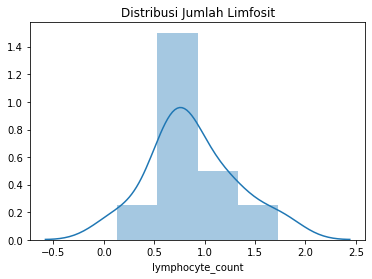

In [28]:
limfosit = df_covid.groupby('patientid')["lymphocyte_count"].first().dropna()
sns.distplot(limfosit)
plt.title("Distribusi Jumlah Limfosit")

# Lokasi
<a id="lokasi"/>

In [29]:
locations = df_covid['location'].value_counts()
locations

Italy                                                                              64
Spain                                                                              13
Wenzhou, China                                                                     10
Taoyuan General Hospital, Taoyuan, Taiwan                                           8
Snohomish County, Washington, USA                                                   7
North Derbyshire, UK                                                                7
China                                                                               6
Taiwan                                                                              6
University of California Irvine, Orange, CA USA                                     5
Nottingham, United Kingdom                                                          5
Myongji Hospital, Goyang, Korea                                                     5
Hospital of Wuhan University, Wuhan, China            

In [30]:
df_covid['country_location'] = df_covid['location'].apply(lambda x: str(x).split()[-1])
country_counts = df_covid.groupby('patientid')['country_location'].first().value_counts()
country_counts = country_counts.drop("nan")
country_counts

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Italy        49
China        25
Spain        10
Taiwan        5
Iran          5
USA           4
Kingdom       4
Vietnam       2
Australia     2
Pakistan      1
Belgium       1
UK            1
Sweden        1
Canada        1
Korea         1
Portugal      1
Israel        1
Turkey        1
Germany       1
Name: country_location, dtype: int64

In [31]:
country_counts['UK'] = country_counts['UK'] + country_counts['Kingdom']
country_counts = country_counts[country_counts.index != "Kingdom"].sort_values(ascending=False)
country_counts

Italy        49
China        25
Spain        10
Taiwan        5
Iran          5
UK            5
USA           4
Australia     2
Vietnam       2
Germany       1
Turkey        1
Belgium       1
Sweden        1
Canada        1
Korea         1
Portugal      1
Israel        1
Pakistan      1
Name: country_location, dtype: int64

Text(0.5, 1.0, 'Lokasi dimana Pasien Dirawat')

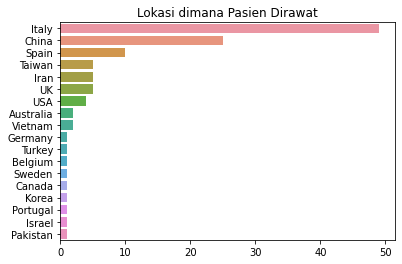

In [32]:
y = country_counts.index
x = country_counts.values
sns.barplot(x=x, y=y)
plt.title("Lokasi dimana Pasien Dirawat")

In [36]:
df_covid.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28,country_location
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,Taiwan


In [39]:
def to_int(x):
    if x == "Y":
        return 1
    elif x == "N":
        return 0
    else :
        return x

df_covid["survival"] = df_covid["survival"].apply(to_int)
df_covid.head()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28,country_location
0,2,0.0,M,65.0,COVID-19,1.0,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
1,2,3.0,M,65.0,COVID-19,1.0,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
2,2,5.0,M,65.0,COVID-19,1.0,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
3,2,6.0,M,65.0,COVID-19,1.0,NaN,NaN,NaN,NaN,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,Vietnam
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,Taiwan


Text(0.5, 1.0, 'Heatmap Korelasi Fitur-fitur')

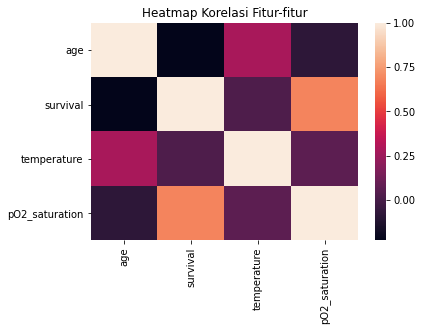

In [41]:
sns.heatmap(df_covid.drop(["patientid", "offset", "leukocyte_count", "neutrophil_count", "lymphocyte_count"],axis=1).corr())
plt.title("Heatmap Korelasi Fitur-fitur")